In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

In [48]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

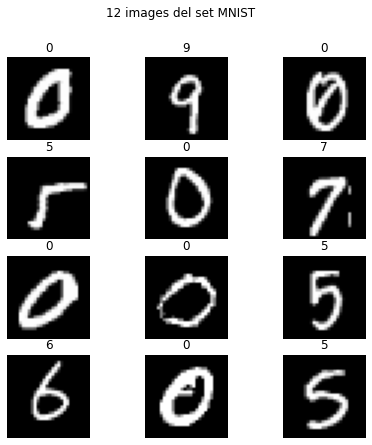

In [49]:
imagenes = np.random.randint(0,x_train.shape[0],12)
plt.figure(figsize=(7,7))
for i in range(len(imagenes)):
    img = x_train [imagenes[i],:,:]
    plt.subplot(4,3,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.title(y_train[imagenes[i]])
plt.suptitle('12 images del set MNIST')
plt.show()

In [50]:
#Normalizar los datos:
X_train = x_train/255.0
X_test = x_test/255.0

In [51]:
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [52]:
print(X_train.shape)

(60000, 28, 28)


TRAINING

In [53]:
#Indicar que solo se usara escala de grises
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [54]:
#Build the Neural network model
modelo = Sequential()
modelo.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the network to make it a vector and create the neural network with 2 hidden layers
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclasses,activation='sigmoid'))

In [55]:
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [66]:
#Compilar el modelo
#modelo.compile(tf.keras.optimizers.SGD(0.2),loss='categorical_crossentropy',metrics=['accuracy'])
modelo.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
modeloEntrenado = modelo.fit(X_train,Y_train,epochs=10,batch_size=128,verbose=2,validation_data=(X_test,Y_test))

Epoch 1/10
469/469 - 13s - loss: 1.4733 - accuracy: 0.5302 - val_loss: 0.4774 - val_accuracy: 0.8471
Epoch 2/10
469/469 - 8s - loss: 0.3249 - accuracy: 0.9033 - val_loss: 0.2235 - val_accuracy: 0.9355
Epoch 3/10
469/469 - 9s - loss: 0.2184 - accuracy: 0.9350 - val_loss: 0.1627 - val_accuracy: 0.9530
Epoch 4/10
469/469 - 8s - loss: 0.1724 - accuracy: 0.9472 - val_loss: 0.1359 - val_accuracy: 0.9614
Epoch 5/10
469/469 - 8s - loss: 0.1440 - accuracy: 0.9561 - val_loss: 0.1248 - val_accuracy: 0.9631
Epoch 6/10
469/469 - 9s - loss: 0.1264 - accuracy: 0.9613 - val_loss: 0.1092 - val_accuracy: 0.9663
Epoch 7/10
469/469 - 9s - loss: 0.1133 - accuracy: 0.9660 - val_loss: 0.0986 - val_accuracy: 0.9708
Epoch 8/10
469/469 - 8s - loss: 0.1040 - accuracy: 0.9682 - val_loss: 0.0902 - val_accuracy: 0.9725
Epoch 9/10
469/469 - 9s - loss: 0.0957 - accuracy: 0.9708 - val_loss: 0.0846 - val_accuracy: 0.9732
Epoch 10/10
469/469 - 8s - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.0753 - val_accuracy: 0.977

In [62]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 97.7%


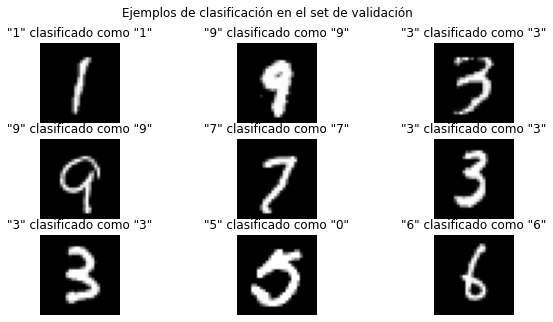

In [63]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()

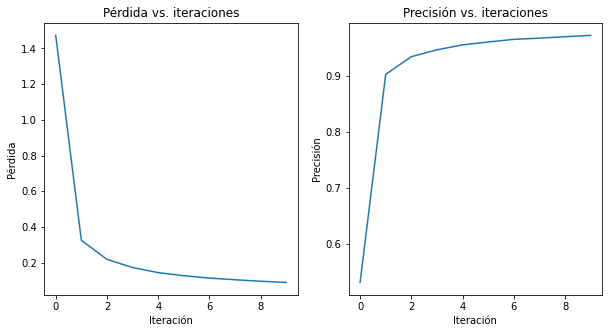

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

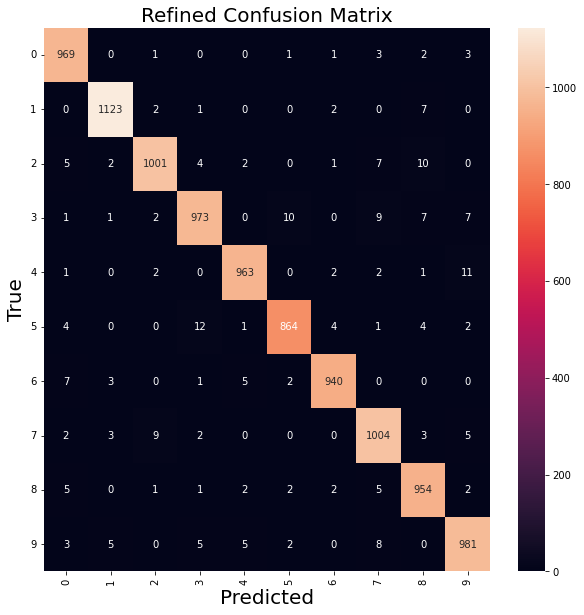

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['0','1','2','3','4','5','6','7','8','9']
#Y_pred = modelo.predict(X_test)
#classes_y=np.argmax(Y_pred,axis=1)
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

In [61]:
import pandas as pd